In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn. preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import re
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [2]:
Testset = pd.read_csv("C:/Users/SHREYAN/Downloads/sentiment-prediction-on-movie-reviews/test.csv")
Trainset = pd.read_csv("C:/Users/SHREYAN/Downloads/sentiment-prediction-on-movie-reviews/train.csv")
Movies = pd.read_csv("C:/Users/SHREYAN/Downloads/sentiment-prediction-on-movie-reviews/movies.csv")

In [3]:
'''from sklearn.dummy import DummyClassifier
X = train_data["movieid"]
y = train_data["sentiment"]
dummy_clf = DummyClassifier()
dummy_clf.fit(X, y)
DummyClassifier()
dummy_clf.predict(X)

sub = pd.DataFrame(dummy_clf.predict(test_data["movieid"]), columns=['sentiment'])
sub.index.name = 'id'
sub.to_csv("testOutput.csv", encoding='utf-8')

output = pd.read_csv("testOutput.csv")'''

'from sklearn.dummy import DummyClassifier\nX = train_data["movieid"]\ny = train_data["sentiment"]\ndummy_clf = DummyClassifier()\ndummy_clf.fit(X, y)\nDummyClassifier()\ndummy_clf.predict(X)\n\nsub = pd.DataFrame(dummy_clf.predict(test_data["movieid"]), columns=[\'sentiment\'])\nsub.index.name = \'id\'\nsub.to_csv("testOutput.csv", encoding=\'utf-8\')\n\noutput = pd.read_csv("testOutput.csv")'

# **EXPLORATORY DATA ANALYSIS**

In [4]:
Movies.isnull().sum() # most of the entries are missing. Hence wasn't used for the process.

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [5]:
Trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [6]:
Trainset.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [7]:
Trainset.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

# **DATA PREPROCESSING**

In [8]:
Train_data = Trainset[["reviewText","sentiment"]] # Other feattures are ruled out intuitively as 'sentiment' is indeoendent of MovieID, reviewerName or being a frequent reviewer
Test_data = Testset["reviewText"]

> # Imputation & Encoding

In [9]:
from sklearn.compose import ColumnTransformer

si = SimpleImputer(strategy='most_frequent')
le = LabelEncoder()

# Impute Train_data
train_text = Train_data["reviewText"].values
train_text = si.fit_transform(train_text.reshape(-1,1))
train_text = train_text.ravel() #.ravel()  returns contiguous flattened array

# Encode 'sentiment' feature
sent = Train_data["sentiment"]
sent = le.fit_transform(sent)

data = {"reviewText" : train_text, "sentiment": sent}
Train_data = pd.DataFrame(data)

#Impute Test_data
test_text = Test_data.values
test_text = si.transform(test_text.reshape(-1,1))
test_text = test_text.ravel() #.ravel()  returns contiguous flattened array

Test_data = pd.Series(test_text)

In [10]:
le.transform(["POSITIVE","NEGATIVE"])

array([1, 0])

> # Regex 

>> # Regex Syntax :
>>* ‘+’ -> repeatition of preceding character one or more times
>>* '?' -> preceding character may or may not be present in the string
>>* '\\' -> followed by
>>* '|' -> or operator
>>* '[#@]\S+' -> string group which starts with # or @, followed by non-whitespace character(\S)
>>* 'http[s]?\://\S+' -> string group that corresponds to an URL
>>* '[0-9]' -> string group containing numbers
>>* '(\(.*\))|(\[.*\])' -> string group of the form (...) or [...]
>>* '\n|\t' -> remove tabspaces and newlines

In [11]:
# For Train_data
Reg_train_text = []
for i in Train_data["reviewText"].values:
  clean_text = re.sub(r"(http[s]?\://\S+)|[0-9]|(\(.*\))|(\[.*\])|([#@]\S+)|\n|\t", "",i) # substitute with empty string
  Reg_train_text.append(clean_text)

sent = Train_data["sentiment"]

data = {"reviewText" : Reg_train_text, "sentiment": sent}
Train_data = pd.DataFrame(data)

# For Test_data
Reg_test_text = []
for i in Test_data.values:
  clean_text = re.sub(r"(http[s]?\://\S+)|[0-9]|(\(.*\))|(\[.*\])|([#@]\S+)|\n|\t", "",i) # substitute with empty string
  Reg_test_text.append(clean_text)
    
Test_data = pd.Series(Reg_test_text)

> # Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF is better than BoW as it takes account of the rarity of a word

vectorizer = TfidfVectorizer()

X = Train_data["reviewText"]
y = Train_data["sentiment"]


X = vectorizer.fit_transform(X)
Test_data = vectorizer.transform(Test_data)

In [13]:
'''from sklearn.feature_extraction.text import CountVectorizer # BoW just accounts for the frequencies of a word

vectorizer = CountVectorizer()

X = Train_data["reviewText"]
y = Train_data["sentiment"]


X = vectorizer.fit_transform(X)
Test_data = vectorizer.transform(Test_data)
'''

'from sklearn.feature_extraction.text import CountVectorizer # BoW just accounts for the frequencies of a word\n\nvectorizer = CountVectorizer()\n\nX = Train_data["reviewText"]\ny = Train_data["sentiment"]\n\n\nX = vectorizer.fit_transform(X)\nTest_data = vectorizer.transform(Test_data)\n'

> # Visualisation

In [14]:
y.value_counts()

1    108761
0     53997
Name: sentiment, dtype: int64

Text(0, 0.5, 'count')

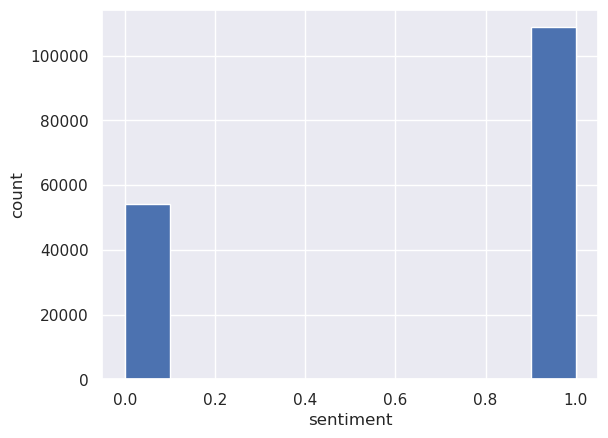

In [15]:
sns.set()
y.hist()
plt.xlabel('sentiment')
plt.ylabel('count')

Reviews are mostly labelled as POSITIVE/1

> # Feauture Selection and Normalization Pipeline

In [16]:
X.shape # Too many features

(162758, 63816)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import Normalizer
k = 40000 # 40000 selected as it gave better metrics after training and validation. Others tested were 20000, 100, 45000, 50000 all of which were worse
estimators = [
('selector', SelectKBest(score_func=chi2, k=k)),
('normalizer', Normalizer()), # StsndardScalar/MinMaxScalar doesn't work on sparse matrices. MaxAbsSclar workd but performs slightly worse tha Normalizer.
]
pipe = Pipeline(steps=estimators)

X_transformed = pipe.fit_transform(X, y)
Test_data = pipe.transform(Test_data)


In [18]:
X_transformed.shape 

(162758, 40000)

> # Train_test  split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

# **MODEL TRAINING AND TESTING**

> # LinearSVC

              precision    recall  f1-score   support

           0       0.75      0.63      0.69     16201
           1       0.83      0.89      0.86     32627

    accuracy                           0.81     48828
   macro avg       0.79      0.76      0.77     48828
weighted avg       0.80      0.81      0.80     48828

[[10266  5935]
 [ 3449 29178]]


<Axes: >

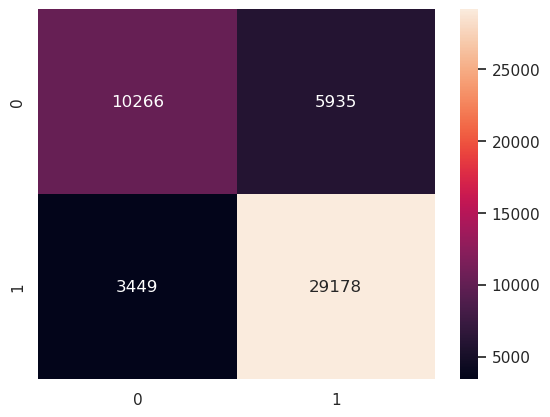

In [20]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

pred_CLF = clf.predict(X_test)

print(classification_report(y_test , pred_CLF))
cf_mat = confusion_matrix(y_test , pred_CLF)
print(cf_mat)
sns.heatmap(cf_mat, fmt='', annot=True)

### Good at classification NEGATIVE/0 data points.
### Great at classification of POSITIVE/1 data points.

In [21]:
#accuracy_score
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test, pred_CLF),3)

0.808

> # Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.58      0.66     16201
           1       0.81      0.91      0.86     32627

    accuracy                           0.80     48828
   macro avg       0.79      0.75      0.76     48828
weighted avg       0.80      0.80      0.79     48828

[[ 9354  6847]
 [ 2830 29797]]


<Axes: >

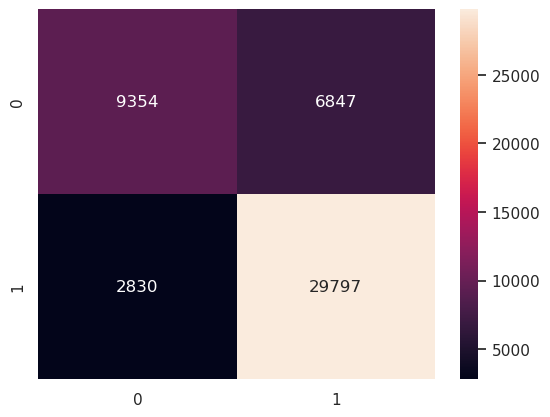

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 500)
logreg.fit(X_train, y_train)

pred_LREG = logreg.predict(X_test)

print(classification_report(y_test , pred_LREG))
cf_mat = confusion_matrix(y_test , pred_LREG)
print(cf_mat)
sns.heatmap(cf_mat, fmt='', annot=True)


### Bit worse at classification NEGATIVE/0 data points.
### Great at classification of POSITIVE/1 data points.

# **HYPERPARAMETER TUNING**

> # Logistic Regression in GridSearchCV

In [23]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logistic_regression = LogisticRegression(solver = 'newton-cholesky', max_iter = 1000 ) # ‘newton-cholesky’ is a good choice for n_samples >> n_features

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

pred_LRGS = grid_search.predict(X_test)

print(classification_report(y_test , pred_LRGS))
cf_mat = confusion_matrix(y_test , pred_LRGS)
sns.heatmap(cf_mat, fmt='', annot=True)
'''

"\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the logistic regression model\nlogistic_regression = LogisticRegression(solver = 'newton-cholesky', max_iter = 1000 ) # ‘newton-cholesky’ is a good choice for n_samples >> n_features\n\n# Define the parameter grid for hyperparameter tuning\nparam_grid = {\n    'C': [0.1, 1, 10]\n}\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(logistic_regression, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\npred_LRGS = grid_search.predict(X_test)\n\nprint(classification_report(y_test , pred_LRGS))\ncf_mat = confusion_matrix(y_test , pred_LRGS)\nsns.heatmap(cf_mat, fmt='', annot=True)\n"

> # MultinomialNB in GridSearchCV

              precision    recall  f1-score   support

           0       0.82      0.52      0.63     16201
           1       0.80      0.94      0.86     32627

    accuracy                           0.80     48828
   macro avg       0.81      0.73      0.75     48828
weighted avg       0.80      0.80      0.79     48828



<Axes: >

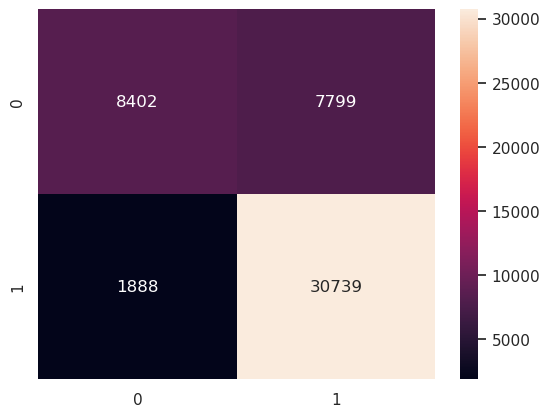

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes model
naive_bayes = MultinomialNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)
grid_search.fit(X_train, y_train)


pred_MNB = grid_search.predict(X_test)

print(classification_report(y_test , pred_MNB))
cf_mat = confusion_matrix(y_test , pred_MNB)
sns.heatmap(cf_mat, fmt='', annot=True)


### Bad at classification of NEGATIVE/0.
### Great at classification of POSITIVE/1 data points.

> # RandomForestClassifier in GridSearchCV

In [25]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest model
random_forest = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

pred_RFGS = grid_search.predict(X_test)

print(classification_report(y_test , pred_RFGS))
cf_mat = confusion_matrix(y_test , pred_RFGS)
sns.heatmap(cf_mat, fmt='', annot=True)
'''

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the random forest model\nrandom_forest = RandomForestClassifier()\n\n# Define the parameter grid for hyperparameter tuning\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 5, 10]\n}\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(random_forest, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\npred_RFGS = grid_search.predict(X_test)\n\nprint(classification_report(y_test , pred_RFGS))\ncf_mat = confusion_matrix(y_test , pred_RFGS)\nsns.heatmap(cf_mat, fmt='', annot=True)\n"

> # SVC in GridSearchCV

In [26]:
'''from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

pred_SVCGS = grid_search.predict(X_test)

print(classification_report(y_test , pred_SVCGS))
cf_mat = confusion_matrix(y_test , pred_SVCGS)
sns.heatmap(cf_mat, fmt='', annot=True)'''

"from sklearn.svm import SVC\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the SVM model\nsvm = SVC()\n\n# Define the parameter grid for hyperparameter tuning\nparam_grid = {\n    'C': [0.1, 1, 10],\n    'kernel': ['linear', 'rbf']\n}\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(svm, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\npred_SVCGS = grid_search.predict(X_test)\n\nprint(classification_report(y_test , pred_SVCGS))\ncf_mat = confusion_matrix(y_test , pred_SVCGS)\nsns.heatmap(cf_mat, fmt='', annot=True)"

# **MODEL PREDICTION**

In [27]:
prediction = clf.predict(Test_data)

In [28]:
sub = pd.DataFrame(prediction, columns=['sentiment'])
sub.index.name = 'id'
sub.loc[ sub["sentiment"] == 1 , "sentiment"] = "POSITIVE"
sub.loc[ sub["sentiment"] == 0 , "sentiment"] = "NEGATIVE"
sub.to_csv("testOutput.csv", encoding='utf-8')

output = pd.read_csv("testOutput.csv")

In [29]:
sub.value_counts()

sentiment
POSITIVE     40159
NEGATIVE     15156
dtype: int64

Text(0, 0.5, 'count')

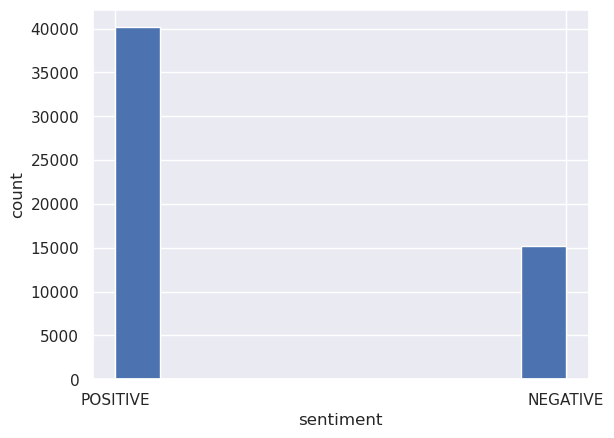

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sub.sentiment.hist()
plt.xlabel('sentiment')
plt.ylabel('count')

### Model leans towards POSITIVE sentiment, which is justified as Training data mostly contained reviews with POSITIVE sentiment.
### Model may be slightly overfitted.